#### current model rankings:
    -- multiple linear regression top 13: 
        -- train r2: 0.8398746382511695
        -- test r2: 0.832062018957993
    -- multiple linear regression top 9: 
        -- train r2: 0.8306789419662404
        -- test r2: 0.8192850215786349
    -- simple linear regression with top variable: 
        -- train r2: 0.632429112473086
        -- test r2: 0.6008763278243092

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
style.use('fivethirtyeight')
import helper # my function that i added
import missingno as msno


In [2]:
colors = ["#FF0B04", "#F1BE48",
           "#B9975B", "#8B5B29",
           "#524727",
         ]
sns.set_palette(sns.color_palette(colors))
sns.color_palette()

[(1.0, 0.043137254901960784, 0.01568627450980392),
 (0.9450980392156862, 0.7450980392156863, 0.2823529411764706),
 (0.7254901960784313, 0.592156862745098, 0.3568627450980392),
 (0.5450980392156862, 0.3568627450980392, 0.1607843137254902),
 (0.3215686274509804, 0.2784313725490196, 0.15294117647058825)]

In [3]:
housing = pd.read_csv('Ames_Housing_Price_Data.csv', index_col=0)

train, test = helper.stratified_split(housing,'Neighborhood')

In [4]:
target = ['SalePrice']
key = ['PID'] 
numeric = ['GrLivArea','LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea',
           'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF',
           'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YrSold'
          ]
numeric_to_categorical = ['MSSubClass','MoSold']
categorical = ['MSZoning','Street','Alley','LotShape','LandContour','LotConfig',
               'LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
               'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation',
               'BsmtFinType1','BsmtFinType2','Heating','Electrical','GarageType',
               'GarageFinish','PavedDrive','MiscFeature','SaleType','SaleCondition',
               'Utilities',
              ]
binary = ['CentralAir',
         
         ]
cat_ordinal = [
               'OverallQual','OverallCond', # numeric?
               'ExterQual','ExterCond', # {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
               'BsmtQual','BsmtCond', # {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
               'BsmtExposure', # {'No':1,'Mn':2,'Av':3,'Gd':4}
               'HeatingQC', # {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
               'BsmtFullBath','BsmtHalfBath', # numeric?
               'FullBath','HalfBath', # numeric?
               'BedroomAbvGr', # numeric?
               'KitchenAbvGr', # numeric?
               'KitchenQual', # {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
               'TotRmsAbvGrd', # numeric?
               'Functional', # {'Sal':1,'Sev':2,'Maj2':3,'Maj1':4,
                             #  'Mod':5,'Min2':6,'Min1':7,'Typ':8}
               'Fireplaces', # numeric?
               'FireplaceQu', # {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
               'GarageCars', # numeric?
               'GarageQual', # {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
               'GarageCond', # {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
               'PoolQC', # {'Fa':1,'TA':2,'Gd':3,'Ex':4}
               'Fence' #{'MnWw':1,'GdWo':2,'MnPrv':3,'GdPrv':4}
               
               
              ]

## train cleaning

In [5]:
# converting all similar mappings together
# most popular mapping
cat_ordinal_features = [
    'GarageQual','GarageCond',
    'FireplaceQu',
    'KitchenQual',
    'ExterQual','ExterCond',
    'BsmtQual','BsmtCond',
    'HeatingQC'
    ]
cat_ordinal_dict = {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
train = helper.convert_cat_ordinal_vars_to_num(train,
                                               cat_ordinal_features,
                                               cat_ordinal_dict)
# now just unique mappings
# BsmtExposure
cat_ordinal_features = [
    'BsmtExposure'
]
cat_ordinal_dict = {'No':1,'Mn':2,'Av':3,'Gd':4}
train = helper.convert_cat_ordinal_vars_to_num(train,
                                               cat_ordinal_features,
                                               cat_ordinal_dict)
# Functional
cat_ordinal_features = [
    'Functional'
]
cat_ordinal_dict = {'Sal':1,'Sev':2,'Maj2':3,'Maj1':4,
                    'Mod':5,'Min2':6,'Min1':7,'Typ':8}
train = helper.convert_cat_ordinal_vars_to_num(train,
                                               cat_ordinal_features,
                                               cat_ordinal_dict)
# PoolQC
cat_ordinal_features = [
    'PoolQC'
]
cat_ordinal_dict = {'Fa':1,'TA':2,'Gd':3,'Ex':4}
train = helper.convert_cat_ordinal_vars_to_num(train,
                                               cat_ordinal_features,
                                               cat_ordinal_dict)
# Fence
cat_ordinal_features = [
    'Fence'
]
cat_ordinal_dict = {'MnWw':1,'GdWo':2,'MnPrv':3,'GdPrv':4}
train = helper.convert_cat_ordinal_vars_to_num(train,
                                               cat_ordinal_features,
                                               cat_ordinal_dict)

In [6]:
# weirdest nas. lot frontage. probably worth removing
# not dealing with them out of expediance. 
drop_now_but_look_at_later = ['LotFrontage','MasVnrArea','GarageYrBlt','MasVnrType']
train.drop(drop_now_but_look_at_later, axis=1,inplace = True)

In [7]:
na_none_features = ['MiscFeature','Alley','BsmtFinType1','BsmtFinType2',
                   'GarageFinish','GarageType']
for na_none_feature in na_none_features:
    train[na_none_feature] = train[na_none_feature].fillna(value = 'None')

In [8]:
na_zero_features = ['BsmtFullBath','BsmtHalfBath']
for na_none_feature in na_zero_features:
    train[na_none_feature] = train[na_none_feature].fillna(value = 0)

In [9]:
cols_na = train.loc[:,train.isna().any(axis=0)].columns.to_list()

cols_na

['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Electrical',
 'GarageCars',
 'GarageArea']

# throwing out rows with any nas. please future me fix this

In [10]:
################# temporary solution of throwing out those few lines. this needs to be fixed
train.dropna(inplace=True)

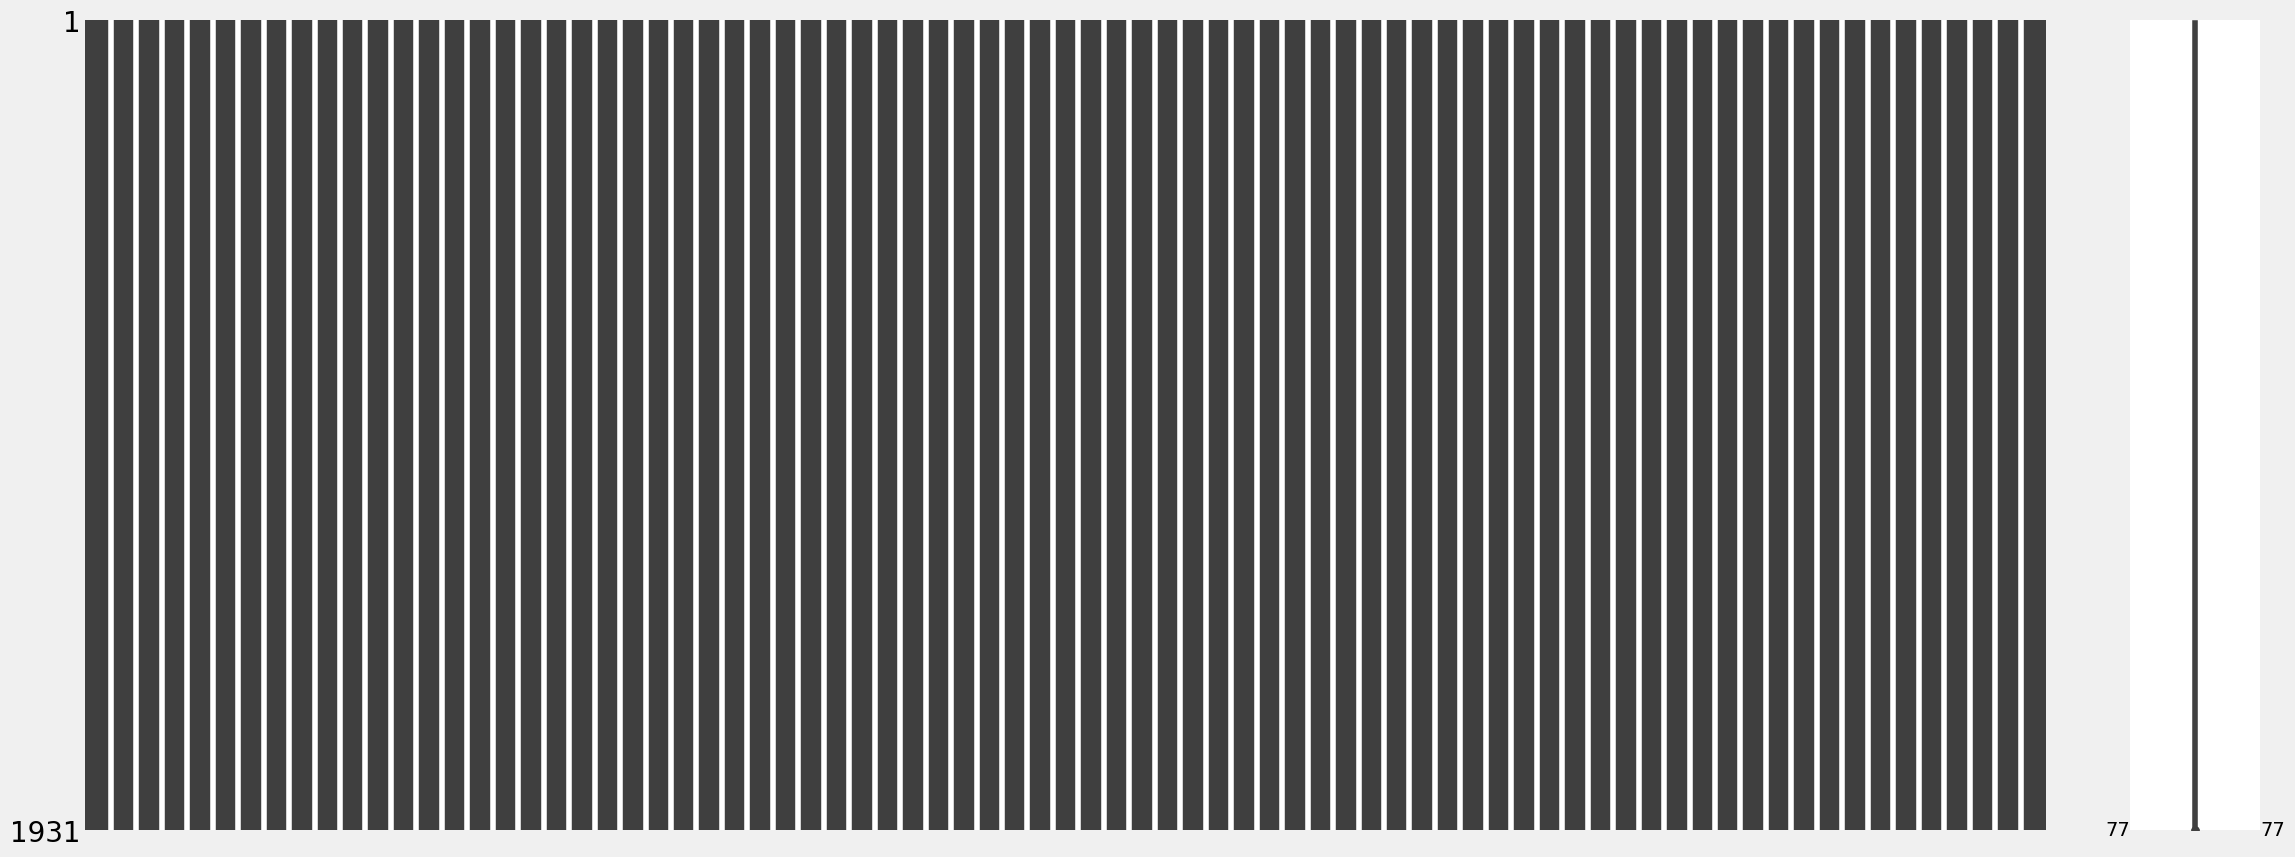

In [11]:
msno.matrix(train)
plt.show()

In [12]:
train.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,535180100,1080,136000,20,RL,9464,Pave,None,Reg,Lvl,...,130,0,0.0,0.0,None,0,6,2008,WD,Normal
1,528166060,2392,386250,20,RL,13472,Pave,None,Reg,Lvl,...,0,0,0.0,0.0,None,0,6,2009,WD,Normal
2,914465055,1710,240000,20,RL,12118,Pave,None,IR1,Lvl,...,180,0,0.0,0.0,None,0,4,2009,WD,Normal
3,923228420,630,81000,180,RM,1890,Pave,None,Reg,Lvl,...,0,0,0.0,0.0,None,0,6,2008,WD,Normal
4,923202060,1771,115000,20,RL,21750,Pave,None,Reg,Lvl,...,0,0,0.0,4.0,None,0,11,2009,WD,Normal


## test clean

In [13]:
# converting all similar mappings together
# most popular mapping
cat_ordinal_features = [
    'GarageQual','GarageCond',
    'FireplaceQu',
    'KitchenQual',
    'ExterQual','ExterCond',
    'BsmtQual','BsmtCond',
    'HeatingQC'
    ]
cat_ordinal_dict = {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
test = helper.convert_cat_ordinal_vars_to_num(test,
                                               cat_ordinal_features,
                                               cat_ordinal_dict)
# now just unique mappings
# BsmtExposure
cat_ordinal_features = [
    'BsmtExposure'
]
cat_ordinal_dict = {'No':1,'Mn':2,'Av':3,'Gd':4}
test = helper.convert_cat_ordinal_vars_to_num(test,
                                               cat_ordinal_features,
                                               cat_ordinal_dict)
# Functional
cat_ordinal_features = [
    'Functional'
]
cat_ordinal_dict = {'Sal':1,'Sev':2,'Maj2':3,'Maj1':4,
                    'Mod':5,'Min2':6,'Min1':7,'Typ':8}
test = helper.convert_cat_ordinal_vars_to_num(test,
                                               cat_ordinal_features,
                                               cat_ordinal_dict)
# PoolQC
cat_ordinal_features = [
    'PoolQC'
]
cat_ordinal_dict = {'Fa':1,'TA':2,'Gd':3,'Ex':4}
test = helper.convert_cat_ordinal_vars_to_num(test,
                                               cat_ordinal_features,
                                               cat_ordinal_dict)
# Fence
cat_ordinal_features = [
    'Fence'
]
cat_ordinal_dict = {'MnWw':1,'GdWo':2,'MnPrv':3,'GdPrv':4}
test = helper.convert_cat_ordinal_vars_to_num(test,
                                               cat_ordinal_features,
                                               cat_ordinal_dict)

In [14]:
# weirdest nas. lot frontage. probably worth removing
# not dealing with them out of expediance. 
drop_now_but_look_at_later = ['LotFrontage','MasVnrArea','GarageYrBlt','MasVnrType']
test.drop(drop_now_but_look_at_later, axis=1,inplace = True)

In [15]:
na_none_features = ['MiscFeature','Alley','BsmtFinType1','BsmtFinType2',
                   'GarageFinish','GarageType']
for na_none_feature in na_none_features:
    test[na_none_feature] = test[na_none_feature].fillna(value = 'None')

In [16]:
na_zero_features = ['BsmtFullBath','BsmtHalfBath']
for na_none_feature in na_zero_features:
    test[na_none_feature] = test[na_none_feature].fillna(value = 'None')

In [17]:
################# temporary solution of throwing out those few lines. this needs to be fixed
test.dropna(inplace=True)


In [18]:
cols_na = test.loc[:,test.isna().any(axis=0)].columns.to_list()

cols_na


[]

In [19]:
numerical_features = train.select_dtypes(exclude = ["object"]).columns

In [20]:
numerical_features

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

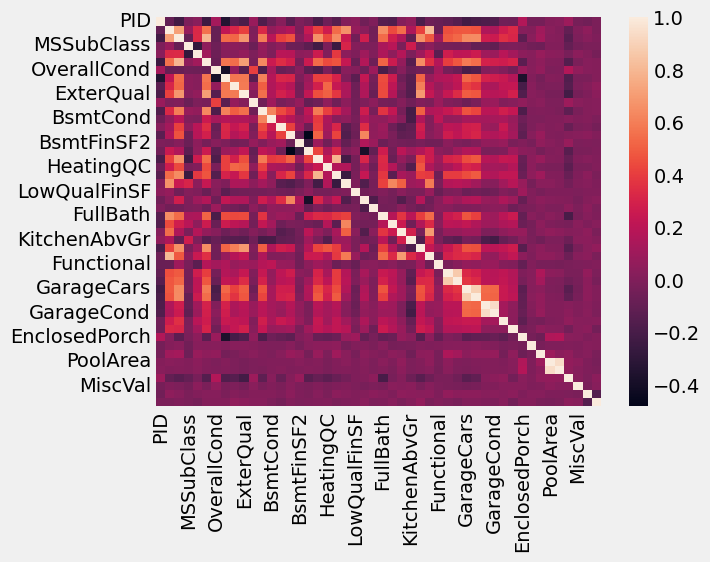

In [21]:
sns.heatmap(train[numerical_features].corr())
plt.show()

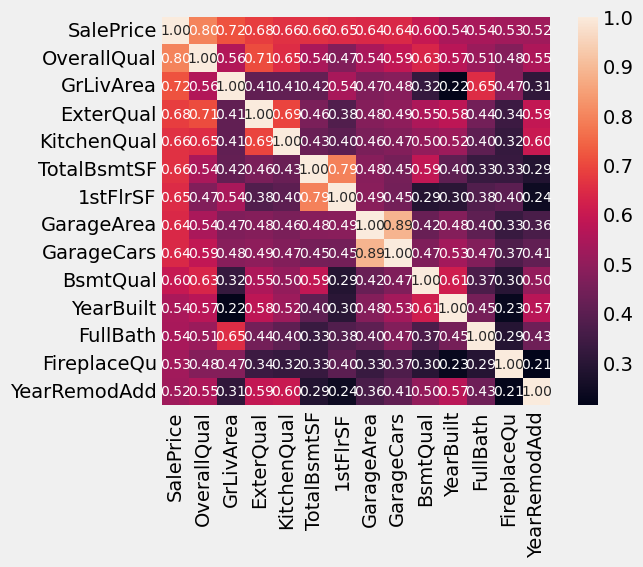

In [22]:
k = 14 #number of variables for heatmap
cols = train.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
# sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [23]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual',
       'TotalBsmtSF', '1stFlrSF', 'GarageArea', 'GarageCars', 'BsmtQual',
       'YearBuilt', 'FullBath', 'FireplaceQu', 'YearRemodAdd'],
      dtype='object')

In [24]:
train_target = train['SalePrice']
test_target = test['SalePrice']


In [25]:
## simple linear with overall quality

In [26]:
from sklearn import linear_model
ols = linear_model.LinearRegression()
train_feature = train['OverallQual']
test_feature = test['OverallQual']
ols.fit(train.reset_index()['OverallQual'].values.reshape(-1,1),
        train.reset_index()['SalePrice'].values.reshape(-1,1)
       )

LinearRegression()

In [27]:
print('intercept %.2f' %ols.intercept_)
print('slope %.2f' %ols.coef_)

intercept -84678.07
slope 43488.89


In [28]:
ols.score(train.reset_index()['OverallQual'].values.reshape(-1,1),
          train.reset_index()['SalePrice'].values.reshape(-1,1))

0.632429112473086

In [29]:
ols.score(test.reset_index()['OverallQual'].values.reshape(-1,1),
          test.reset_index()['SalePrice'].values.reshape(-1,1))

0.6008763278243092

In [30]:
## multiple linear regression with top 9 numerical features. 
## cut off was determined by features with a .6 corr or better.

In [31]:
from sklearn.linear_model import LinearRegression
train_features = train[['OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual',
       'TotalBsmtSF', '1stFlrSF', 'GarageArea', 'GarageCars', 'BsmtQual']]
test_features = test[['OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual',
       'TotalBsmtSF', '1stFlrSF', 'GarageArea', 'GarageCars', 'BsmtQual']]
lm9 = LinearRegression()
lm9.fit(train_features, train_target)

LinearRegression()

In [32]:
print(lm9.intercept_)
print(lm9.coef_)

-159210.33052244707
[13694.59654452    45.36402604 15285.19624071 13238.52796991
    19.1520778     23.50304631    46.40670313  -752.70472302
  6474.47361377]


In [33]:
lm9.score(train_features, train_target)

0.8306789419662404

In [34]:
lm9.score(test_features, test_target)

0.8192850215786349

In [35]:
## now with top 13 features with corr about .5

In [36]:
train_features = train[['OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual',
       'TotalBsmtSF', '1stFlrSF', 'GarageArea', 'GarageCars', 'BsmtQual',
       'YearBuilt', 'FullBath', 'FireplaceQu', 'YearRemodAdd']]
test_features = test[['OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual',
       'TotalBsmtSF', '1stFlrSF', 'GarageArea', 'GarageCars', 'BsmtQual',
       'YearBuilt', 'FullBath', 'FireplaceQu', 'YearRemodAdd']]
lm13 = LinearRegression()
lm13.fit(train_features, train_target)

LinearRegression()

In [37]:
print(lm13.intercept_)
print(lm13.coef_)

-825544.6320911027
[ 12105.29041901     52.36796401  13277.35161693  11172.12360522
     23.4779853      17.43867108     46.26163699  -2437.01705288
   3232.25634881    207.28060569 -11167.10819916   2996.18096792
    151.16447376]


In [38]:
lm13.score(train_features, train_target)

0.8398746382511695

In [39]:
lm13.score(test_features, test_target)

0.832062018957993

In [40]:
train.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3

## price per square foot

In [41]:
train['pricePerSquare'] = train['SalePrice']/train['GrLivArea']
test['pricePerSquare'] = test['SalePrice']/test['GrLivArea']

In [42]:
train_target_perfoot = train['pricePerSquare']
test_target_perfoot = test['pricePerSquare']

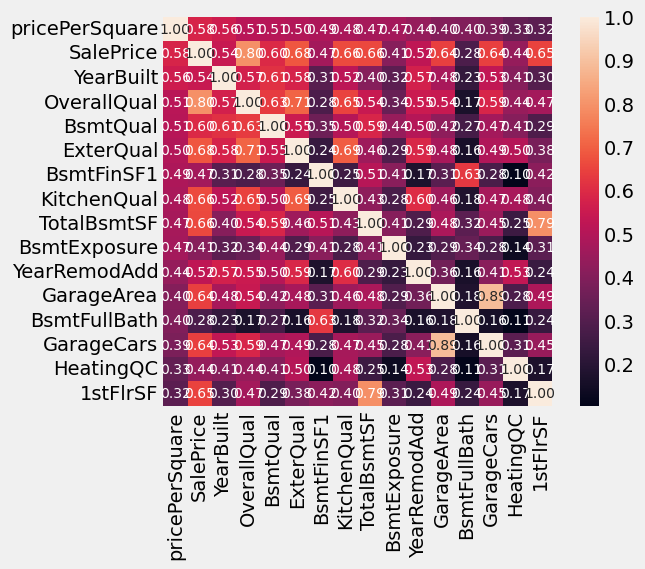

In [43]:
k = 16 #number of variables for heatmap
cols = train.corr().nlargest(k, 'pricePerSquare')['pricePerSquare'].index
cm = np.corrcoef(train[cols].values.T)
# sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [44]:
ols = linear_model.LinearRegression()
train_feature = train['OverallQual']
test_feature = test['OverallQual']
ols.fit(train.reset_index()['OverallQual'].values.reshape(-1,1),
        train.reset_index()['pricePerSquare'].values.reshape(-1,1)
       )

LinearRegression()

In [45]:
print('intercept %.2f' %ols.intercept_)
print('slope %.2f' %ols.coef_)

intercept 51.96
slope 11.43


In [46]:
ols.score(train.reset_index()['OverallQual'].values.reshape(-1,1),
          train.reset_index()['pricePerSquare'].values.reshape(-1,1))

0.26124861891869433

In [47]:
ols.score(test.reset_index()['OverallQual'].values.reshape(-1,1),
          test.reset_index()['pricePerSquare'].values.reshape(-1,1))

0.22694800614278243

In [48]:
cols

Index(['pricePerSquare', 'SalePrice', 'YearBuilt', 'OverallQual', 'BsmtQual',
       'ExterQual', 'BsmtFinSF1', 'KitchenQual', 'TotalBsmtSF', 'BsmtExposure',
       'YearRemodAdd', 'GarageArea', 'BsmtFullBath', 'GarageCars', 'HeatingQC',
       '1stFlrSF'],
      dtype='object')

In [49]:
train_features = train[['YearBuilt', 'OverallQual', 'BsmtQual',
       'ExterQual', 'BsmtFinSF1', 'KitchenQual', 'TotalBsmtSF', 'BsmtExposure',
       'YearRemodAdd', 'GarageArea', 'BsmtFullBath', 'GarageCars', 'HeatingQC',
       '1stFlrSF']]
test_features = test[['YearBuilt', 'OverallQual', 'BsmtQual',
       'ExterQual', 'BsmtFinSF1', 'KitchenQual', 'TotalBsmtSF', 'BsmtExposure',
       'YearRemodAdd', 'GarageArea', 'BsmtFullBath', 'GarageCars', 'HeatingQC',
       '1stFlrSF']]
lm14 = LinearRegression()
lm14.fit(train_features, train_target_perfoot)

LinearRegression()

In [50]:
print(lm14.intercept_)
print(lm14.coef_)

-619.705965400719
[ 0.25185969  2.58559291 -3.04508728  3.84910417  0.01328439  4.39084355
  0.01705969  5.50025594  0.0969872   0.01839449  6.02709304 -4.91327127
  1.03876614 -0.01812307]


In [51]:
lm14.score(train_features, train_target_perfoot)

0.527977931667697

In [52]:
lm14.score(test_features, test_target_perfoot)

0.48492663204409747